ROC AUC Score: 0.9944
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[ 59   4]
 [  2 106]]


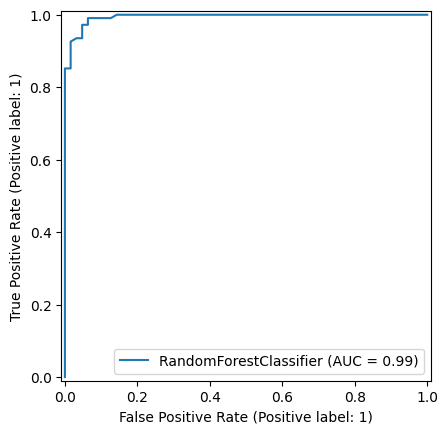

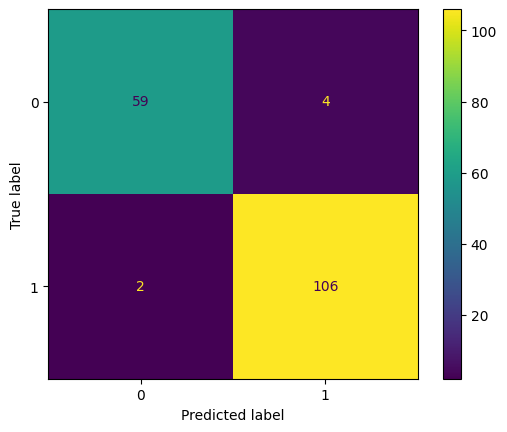

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

iris = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

rFc = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt')   # just change params
rFc.fit(X_train, y_train)

y_pred = rFc.predict(X_test)

y_probs = rFc.predict_proba(X_test)[:, 1] 

# 2. Calculate and print the AUC score
auc_value = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {auc_value:.4f}")  # <-- ADDED THIS LINE

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)


roc_display = RocCurveDisplay.from_estimator(rFc, X_test, y_test)
plt.show()

cm_display = ConfusionMatrixDisplay.from_estimator(rFc, X_test, y_test)
plt.show()
